# FISHscale multi-dataset tutorial
This tutorial contains a demonstration of what is possible with FISHscale for joint analysis of multiple datasets.  
This can for instance be multiple sections of the same tissue sample, or datasets comming from different samples.
  
If you have not tried FISHscale with a single dataset, please have a look at that tutorial for basic FISHscale functionality.

# Imports

In [5]:
#Import FISHscale
import sys
sys.path.insert(0, "/home/lars/storage/Documents/")#FISHscale/")
sys.path.insert(0, "/home/lars/Documents/EEL/")
from FISHscale.utils import dataset

#Import other libraries
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.collections import LineCollection
import numpy as np
import pickle
import os

#Get data path
cur_path = os.path.dirname(os.getcwd())
data_path = os.path.join(cur_path, 'Example_data/Mouse_multi_dataset_example_data/')

%load_ext autoreload
%autoreload 2

# Load data

A FISHscale multi-dataset is an object that contains a list of multiple single FISHscale datasets, like the one used in the single dataset tutorial.  
The `MultiDataset` mostly contains the same functions as the single dataset but provides convenience functions to apply these on all datasets.

Multi-datasets can be loaded in two different ways. Either a folder containing all data files (.csv or .parquet), or a list of already instantiated single FISHscale datasets can be passed. Below we will use the first option.

In [2]:
#Collect files
color_dict = pickle.load(open(data_path + 'Mouse_atlas_168_color_dict.pkl', 'rb'))
unique_genes = pickle.load(open(data_path + 'Mouse_atlas_168_color_dict.pkl', 'rb'))

#Polygons
p1 = np.genfromtxt(data_path +'Polygon_-140_with_gap.csv', delimiter=',')[1:, 1:]
p2 = np.genfromtxt(data_path +'Polygon_600.csv', delimiter=',')[1:, 1:]
p3 = np.genfromtxt(data_path +'Polygon_1200.csv', delimiter=',')[1:, 1:]
p4 = np.genfromtxt(data_path +'Polygon_1810.csv', delimiter=',')[1:, 1:]
p5 = np.genfromtxt(data_path +'Polygon_2420.csv', delimiter=',')[1:, 1:]
p6 = np.genfromtxt(data_path +'Polygon_3000.csv', delimiter=',')[1:, 1:]
p7 = np.genfromtxt(data_path +'Polygon_3600.csv', delimiter=',')[1:, 1:]


md = dataset.MultiDataset(data_path, 
                          x_label='c_px_microscope_stitched', 
                          y_label= 'r_px_microscope_stitched',
                          gene_label = 'decoded_genes', 
                          pixel_size='0.18 micrometer', 
                          polygon=[p1, p2, p3, p4, p5, p6, p7],
                          color_input=color_dict, 
                          reparse=False, 
                          unique_genes=None, 
                          verbose=True, 
                          exclude_genes=['Control1', 'Control2', 'Control3', 'Control4', 'Control5','Control6', 'Control7', 'Control8'],
                          z=[-140, 600, 1200, 1810, 2420, 3000, 3600])

# Have olfactory bulb pointing left.
for mdd in md.datasets:
    mdd.flip_x()
    
# Section 4 is fliped, so flipping it back.
md.datasets[4].flip_y()
md.datasets[4].flip_x()

7it [00:00, 345.16it/s]
/home/lars/Documents/EEL/FISHscale/utils/data_handling.py:177: UserWarning: Object already has an attribute: "polygon". Overwriting "polygon" with stored data from metadata file.
  warnings.warn(f'Object already has an attribute: "{k}". Overwriting "{k}" with stored data from metadata file.')


    Loaded: 211114_14_56_56_LBEXP20201012_EEL_Mouse_3600um_data_summary_simple_plotting_cleaned_microscope_stitched
    Loaded: 211114_09_24_51_LBEXP20201002_EEL_Mouse_1200um_data_summary_simple_plotting_cleaned_microscope_stitched
    Loaded: 211114_14_53_41_LBEXP20201010_EEL_Mouse_3000um_data_summary_simple_plotting_cleaned_microscope_stitched
    Loaded: 211114_09_07_34_LBEXP20201104_EEL_Mouse_600um_2_data_summary_simple_plotting_cleaned_microscope_stitched
    Loaded: 211114_08_40_50_LBEXP20200925_EEL_Mouse_-140um_data_summary_simple_plotting_cleaned_microscope_stitched
    Loaded: 211114_14_49_42_LBEXP20201014_EEL_Mouse_2420um_data_summary_simple_plotting_cleaned_microscope_stitched
    Loaded: 211114_14_45_16_LBEXP20201107_EEL_Mouse_1810um_data_summary_simple_plotting_cleaned_microscope_stitched


# Visualization

Multiple datasets can get very large but the 3D visualizer can rapidly plot this data for interactive exploration. 
Since the example dataset contains multiple datasets comming from the same mouse brain and we have given the Z coordinates we can inspect it in 3D using the `.visualize()` function.

In [6]:
# Center the datasets
md.reset_offset()
# Visualize
md.visualize()

QApplication instance already exists: <PyQt5.QtWidgets.QApplication object at 0x7fe519ddbb80>
MultiDataset
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_08_40_50_LBEXP20200925_EEL_Mouse_-140um_data_summary_simple_plotting_cleaned_microscope_stitched.parquet
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_09_07_34_LBEXP20201104_EEL_Mouse_600um_2_data_summary_simple_plotting_cleaned_microscope_stitched.parquet
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_09_24_51_LBEXP20201002_EEL_Mouse_1200um_data_summary_simple_plotting_cleaned_microscope_stitched.parquet
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_14_45_16_LBEXP20201107_EEL_Mouse_1810um_data_summary_simple_plotting_cleaned_microscope_stitched.parquet
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_14_49_42_LBEXP20201014_EEL_Mouse

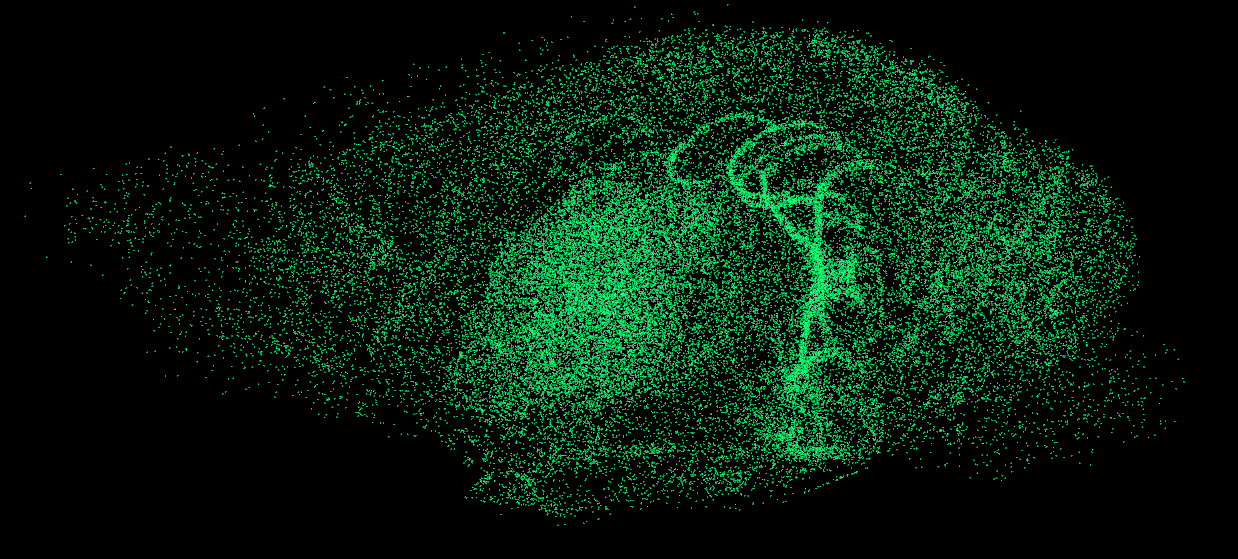

For inpsecting and saving the data can also be plotted using the `.scatter_plot()` function.

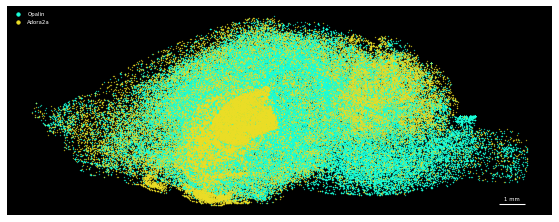

In [7]:
md.scatter_plot(['Opalin', 'Adora2a'])

However as you can see all datasets are now on top of each other because the Z dimention is not plotted. You can nicely arrange them using the `.arange_grid_offset()` function.

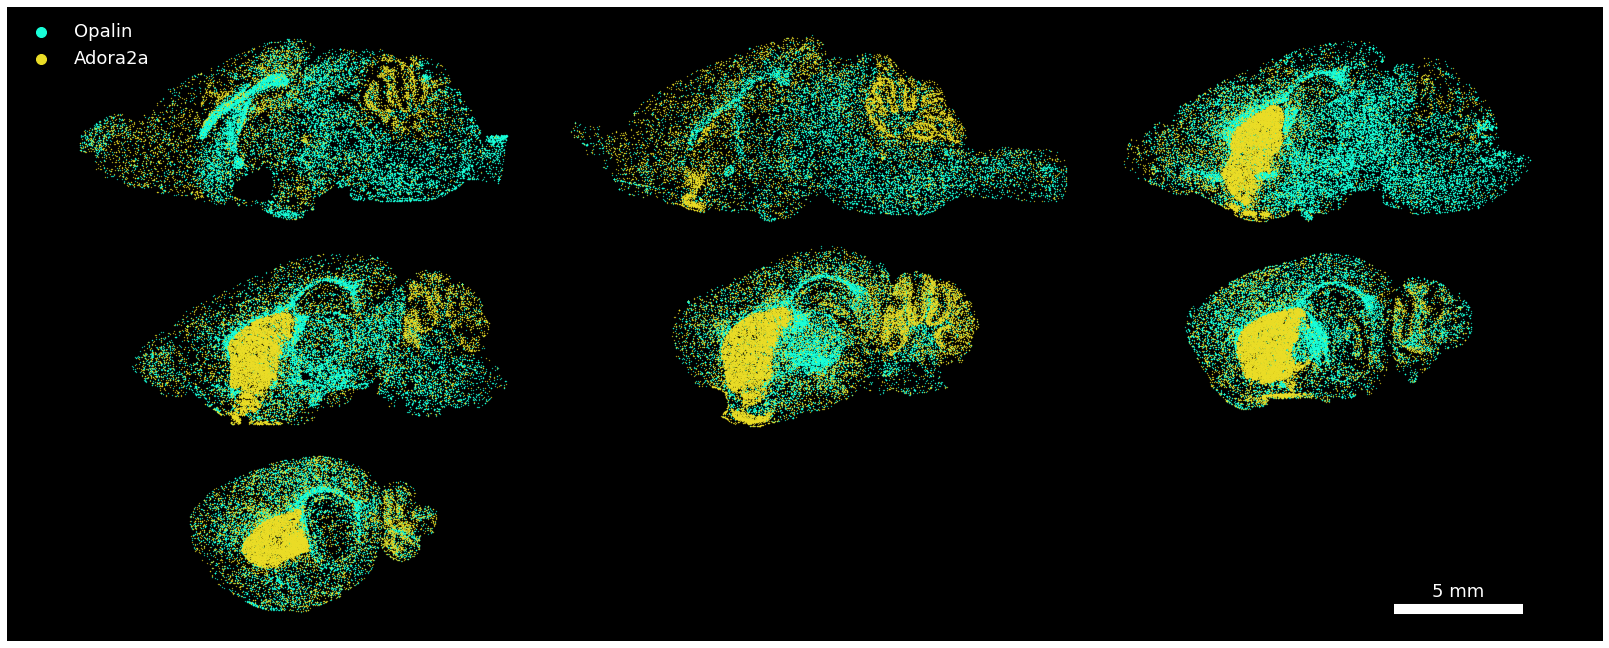

In [8]:
md.arange_grid_offset()
md.scatter_plot(['Opalin', 'Adora2a'])

After arranging the data so that they are next to each other you can still use the `.visualize()` function.

In [9]:
md.visualize()

QApplication instance already exists: <PyQt5.QtWidgets.QApplication object at 0x7fe519ddbb80>
MultiDataset
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_08_40_50_LBEXP20200925_EEL_Mouse_-140um_data_summary_simple_plotting_cleaned_microscope_stitched.parquet
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_09_07_34_LBEXP20201104_EEL_Mouse_600um_2_data_summary_simple_plotting_cleaned_microscope_stitched.parquet
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_09_24_51_LBEXP20201002_EEL_Mouse_1200um_data_summary_simple_plotting_cleaned_microscope_stitched.parquet
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_14_45_16_LBEXP20201107_EEL_Mouse_1810um_data_summary_simple_plotting_cleaned_microscope_stitched.parquet
/home/lars/Documents/EEL/FISHscale/Example_data/Mouse_multi_dataset_example_data/211114_14_49_42_LBEXP20201014_EEL_Mouse

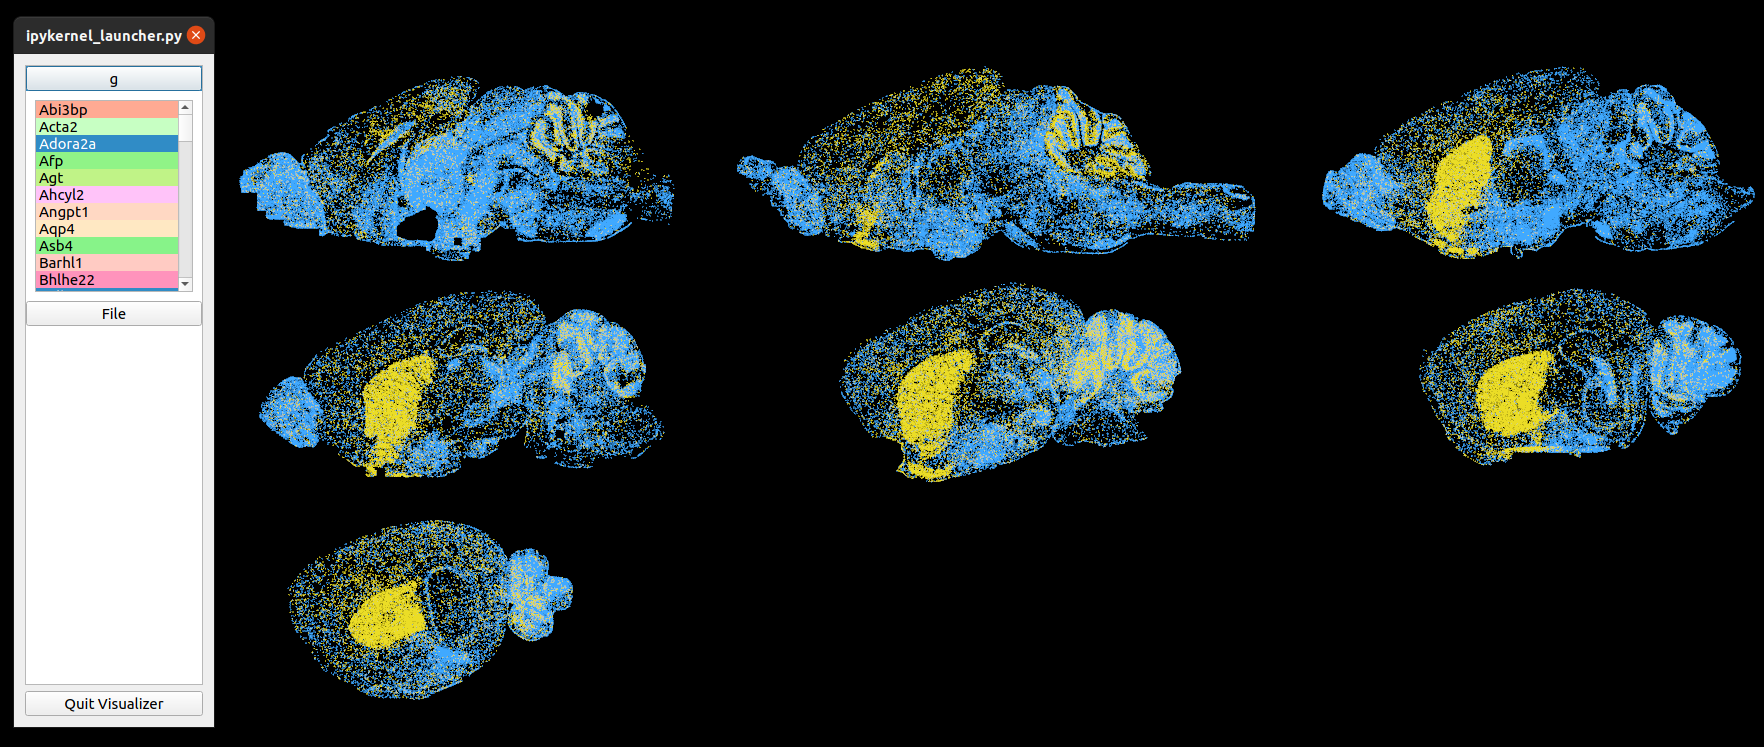

To center the dataset again you can use the `.reset_offset()` function.

# Fishscale attributes
Multi-datasets have a numer of attributes that are common for all individual datasets.

In [27]:
print('Folder where the parsed data and FISHscale metadata can be found ', md.FISHscale_data_folder, '\n')

print('Area of one pixel: ', md.unit_area)
print('Unit scale: ', md.unit_scale)
print('CPU count for processing: ', md.cpu_count, '\n')


print('Names of the individual datasets:')
for i in md.datasets_names:
    print(f'    {i}')


Folder where the parsed data and FISHscale metadata can be found  MultiDataset/MultiDataset_2021-11-26_08-23-20_FISHscale_MultiData 

Area of one pixel:  1 micrometer ** 2
Unit scale:  1 micrometer
CPU count for processing:  8 

Names of the individual datasets:
    211114_08_40_50_LBEXP20200925_EEL_Mouse_-140um_data_summary_simple_plotting_cleaned_microscope_stitched
    211114_09_07_34_LBEXP20201104_EEL_Mouse_600um_2_data_summary_simple_plotting_cleaned_microscope_stitched
    211114_09_24_51_LBEXP20201002_EEL_Mouse_1200um_data_summary_simple_plotting_cleaned_microscope_stitched
    211114_14_45_16_LBEXP20201107_EEL_Mouse_1810um_data_summary_simple_plotting_cleaned_microscope_stitched
    211114_14_49_42_LBEXP20201014_EEL_Mouse_2420um_data_summary_simple_plotting_cleaned_microscope_stitched
    211114_14_53_41_LBEXP20201010_EEL_Mouse_3000um_data_summary_simple_plotting_cleaned_microscope_stitched
    211114_14_56_56_LBEXP20201012_EEL_Mouse_3600um_data_summary_simple_plotting_cleaned_

In [29]:
#Color dictionary with RGB colors for all genes (showing only one gene)
md.color_dict['Aqp4']

(1.0, 0.8136363636363644, 0.5)

In [33]:
#Unique genes for all datasets. Here showing the first 10.
md.unique_genes[:10]

array(['Abi3bp', 'Acta2', 'Adora2a', 'Afp', 'Agt', 'Ahcyl2', 'Angpt1',
       'Aqp4', 'Asb4', 'Barhl1'], dtype='<U8')

# Accessing individual datasets
Since the MultiDataset class contains multiple individual FISHscale datasets, all functionality for the individual datasets is accessible.  
See the single-dataset tutorial for available functions.

In [34]:
# Looping through individual datasets.
for mdd in md.datasets:
    print(type(mdd))

<class 'FISHscale.utils.dataset.Dataset'>
<class 'FISHscale.utils.dataset.Dataset'>
<class 'FISHscale.utils.dataset.Dataset'>
<class 'FISHscale.utils.dataset.Dataset'>
<class 'FISHscale.utils.dataset.Dataset'>
<class 'FISHscale.utils.dataset.Dataset'>
<class 'FISHscale.utils.dataset.Dataset'>


In [38]:
# Accessing metadata.
for mdd in md.datasets:
    print(mdd.z * mdd.unit_scale)

-140 micrometer
600 micrometer
1200 micrometer
1810 micrometer
2420 micrometer
3000 micrometer
3600 micrometer


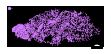

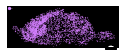

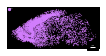

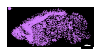

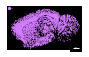

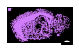

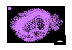

In [40]:
# Making individual plots.
for mdd in md.datasets:
    mdd.scatter_plot('Hs3st2', ax_scale_factor=2, s=0.01)

# Hexagonal binning
Hexagonal binning of all datasets can be performed using the `.hexbin_multi()` funciton.

In [41]:
hb = md.hexbin_multi(spacing=75, min_count=10)

[########################################] | 100% Completed | 22.4s


The results are stored in a dictionary with a entry for each dataset. You can acces them by the dataset name.

In [45]:
hb.keys()

dict_keys(['211114_08_40_50_LBEXP20200925_EEL_Mouse_-140um_data_summary_simple_plotting_cleaned_microscope_stitched', '211114_09_07_34_LBEXP20201104_EEL_Mouse_600um_2_data_summary_simple_plotting_cleaned_microscope_stitched', '211114_09_24_51_LBEXP20201002_EEL_Mouse_1200um_data_summary_simple_plotting_cleaned_microscope_stitched', '211114_14_45_16_LBEXP20201107_EEL_Mouse_1810um_data_summary_simple_plotting_cleaned_microscope_stitched', '211114_14_49_42_LBEXP20201014_EEL_Mouse_2420um_data_summary_simple_plotting_cleaned_microscope_stitched', '211114_14_53_41_LBEXP20201010_EEL_Mouse_3000um_data_summary_simple_plotting_cleaned_microscope_stitched', '211114_14_56_56_LBEXP20201012_EEL_Mouse_3600um_data_summary_simple_plotting_cleaned_microscope_stitched'])

In [46]:
hb['211114_08_40_50_LBEXP20200925_EEL_Mouse_-140um_data_summary_simple_plotting_cleaned_microscope_stitched'].keys()

dict_keys(['df_hex', 'coordinates'])

To quickly acces an item for all datasets use the convenience function `.get_dict_item()`. Under the hood this just iterates over the dataset names and returns all requested items in a list.

In [52]:
md.get_dict_item(hb, 'coordinates')

[array([[-21081.20570673,   4415.42045861],
        [-21006.20570673,   4415.42045861],
        [-20931.20570673,   4415.42045861],
        ...,
        [-20218.70570673,  11365.27432398],
        [-20143.70570673,  11365.27432398],
        [-20068.70570673,  11365.27432398]]),
 array([[-2100.        ,  4317.99260068],
        [-2025.        ,  4317.99260068],
        [-1950.        ,  4317.99260068],
        ...,
        [ -487.5       , 11527.65408719],
        [ -412.5       , 11527.65408719],
        [ -337.5       , 11527.65408719]]),
 array([[16656.20570673,  4317.99260068],
        [16731.20570673,  4317.99260068],
        [16806.20570673,  4317.99260068],
        ...,
        [20556.20570673, 11332.79837134],
        [20631.20570673, 11332.79837134],
        [21081.20570673, 11332.79837134]]),
 array([[-22656.20570673,  -3604.83074325],
        [-21906.20570673,  -3604.83074325],
        [-21081.20570673,  -3604.83074325],
        ...,
        [-17818.70570673,   3085.21550098]

You can plot hexbin results using the `.hexbin_plot()` function.

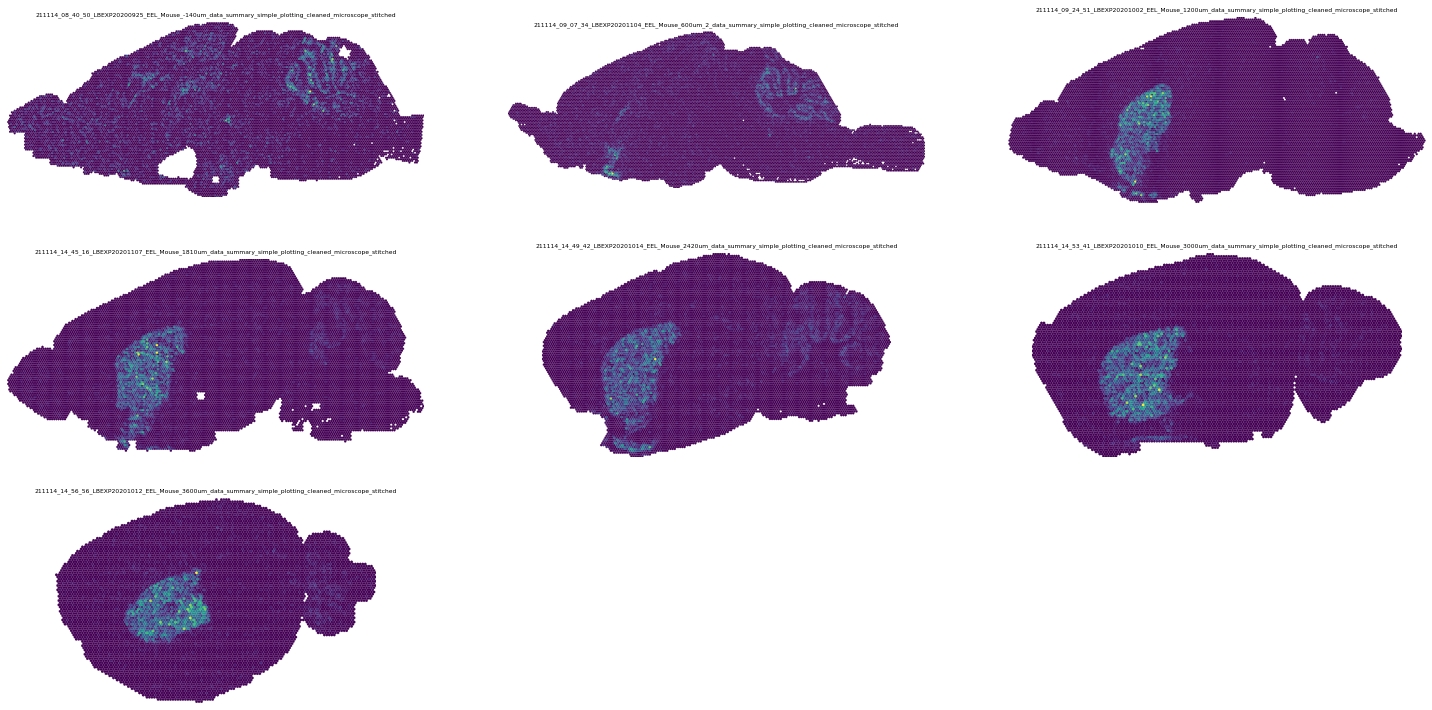

In [57]:
#As input the hexbin_plot() function needs a list of arrays with color values.
results_df = md.get_dict_item(hb, 'df_hex')
gene = [i.loc['Adora2a'] for i in results_df]


md.hexbin_plot(c=gene, figsize=(20,10))

# Regionalization
To regionalize the data you can use the `.regionalize()` function. This will run the regionalization on all individual datasets and optionally link the labels together so that a single region can span multiple samples.

In [3]:
# Regionalize the data
reg = md.regionalize(spacing=75, min_count=10, merge_labels=True)

[########################################] | 100% Completed | 35.5s


7it [00:00,  9.02it/s]


The resulting data of the individual samples can be merged and normalized to use for future analysis of the full dataset.  
In this case we will run a tSNE on all hexagonal bins and spatially plot the tSNE coordinates.  
(tSNE results might deviate from the paper because tSNE is stochastic and will not be identical when re-run.)

7it [00:00, 10.92it/s]


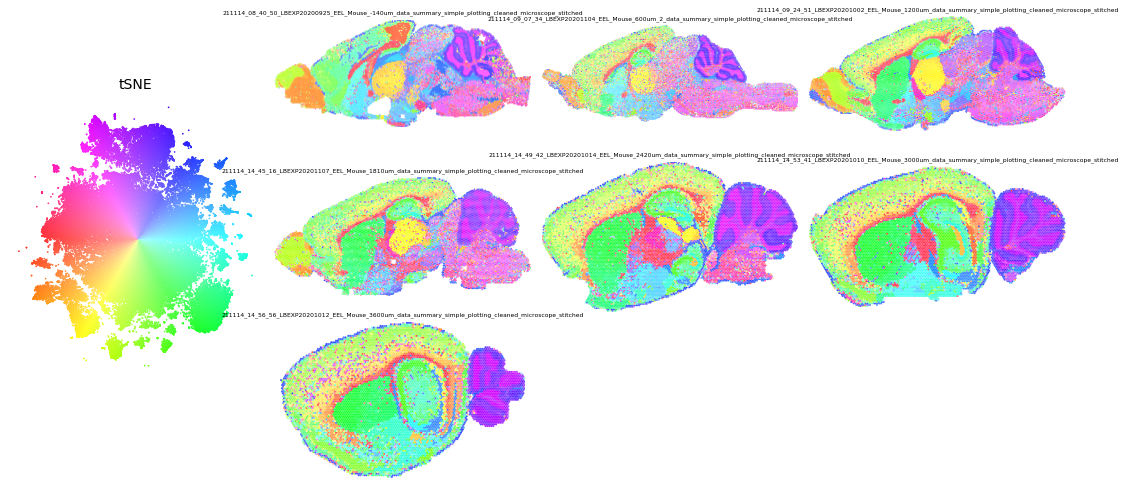

In [62]:
# Merge and normalize
results_df = md.get_dict_item(hb, 'df_hex')
data, samples = md.merge_norm(results_df, mode='APR')

# Make the tSNE and plot.
tsne = md.hexbin_tsne_plot(data, samples)

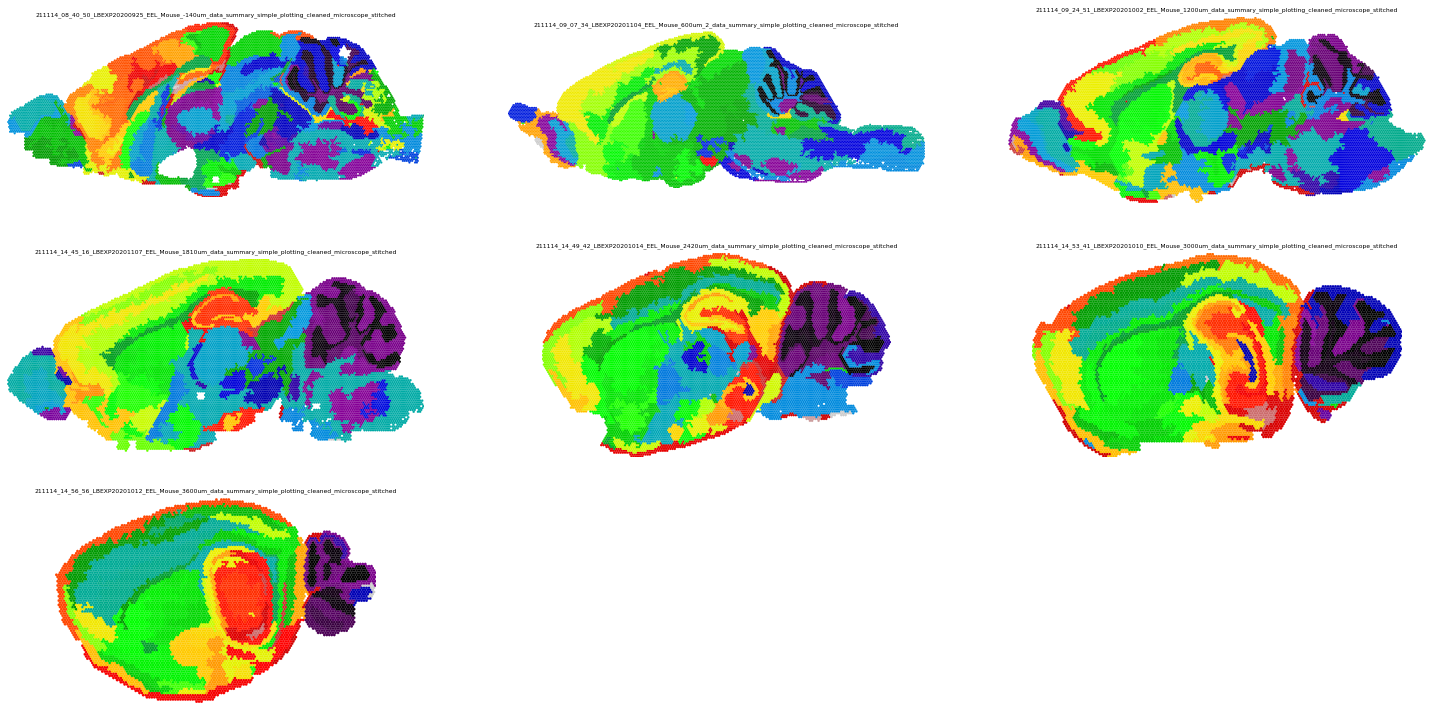

In [63]:
#Plot the merged labels
labels = md.get_dict_item(reg, 'labels_merged')
md.hexbin_plot(c=labels, cm=plt.cm.nipy_spectral, figsize=(20,10))

# Regionalization gradient

In [13]:
reg[md.datasets_names[0]].keys()

dict_keys(['df_hex', 'labels', 'coordinates', 'df_mean', 'df_norm', 'labels_merged'])

In [ ]:
md.da

In [16]:
gradient_regions = md.regionalization_gradient_make_multi(reg, max_depth=14, cm=plt.cm.nipy_spectral)

0it [00:00, ?it/s]

Perfect matches: 13026 out of 15460 which is 84% accuracy


1it [00:03,  3.52s/it]

Perfect matches: 13334 out of 17137 which is 78% accuracy


2it [00:05,  2.56s/it]

Perfect matches: 12698 out of 15385 which is 83% accuracy


3it [00:07,  2.53s/it]

Perfect matches: 11732 out of 13867 which is 85% accuracy


4it [00:09,  2.18s/it]

Perfect matches: 10955 out of 11875 which is 92% accuracy


5it [00:11,  2.02s/it]

Perfect matches: 9035 out of 9834 which is 92% accuracy


6it [00:12,  1.83s/it]

Perfect matches: 8010 out of 8332 which is 96% accuracy


7it [00:14,  2.00s/it]


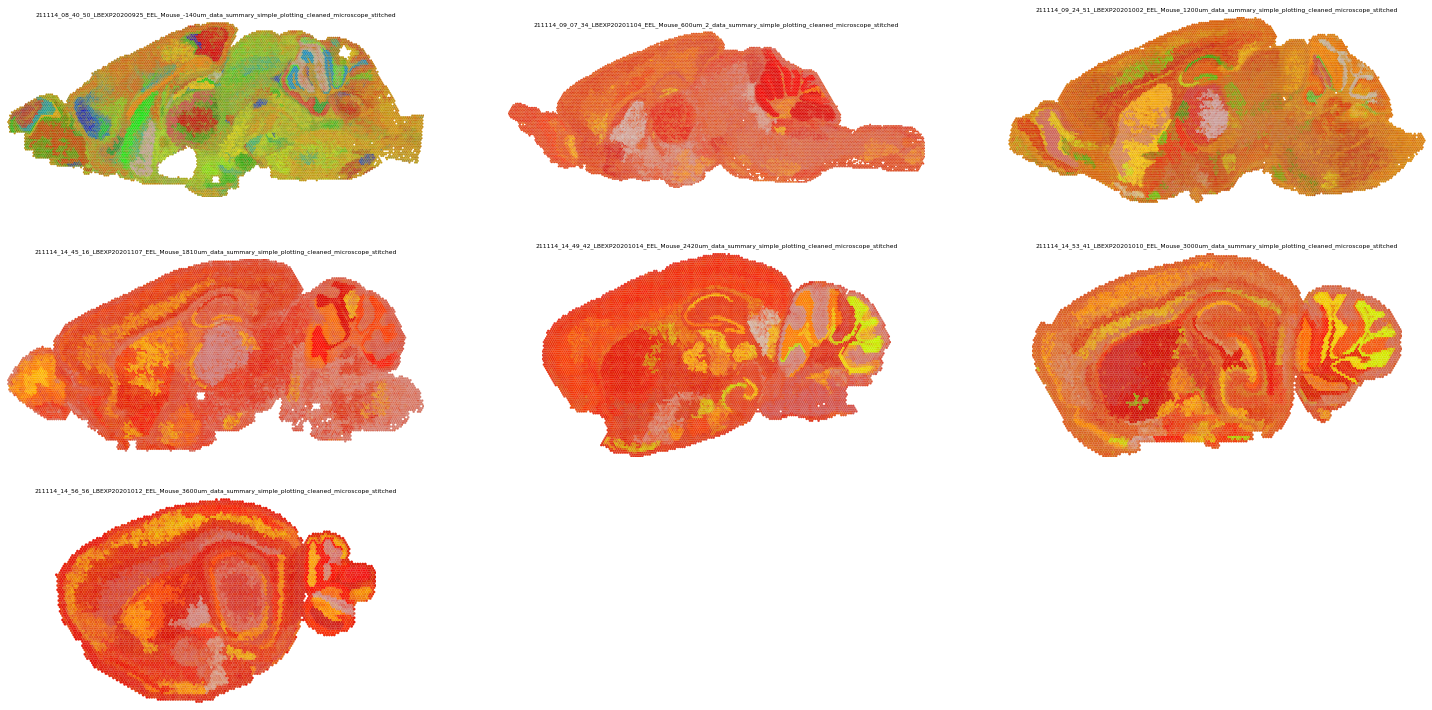

In [17]:
# get resulting mixed colors as a list for each dataset
mixed_colors = md.get_dict_item(gradient_regions, 'mixed_colors')

#Plot results
md.hexbin_plot(mixed_colors, figsize=(20,10))